In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=8, micro=2, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [5]:
# 神经网络中，层的理解
layer = tf.keras.layers.Dense(100)  # 100表示的是神经元的个数
layer = tf.keras.layers.Dense(100, input_shape=(None, 5))  # 指定输入的数据形状，表示该层规模是none*5*100（层数）
layer(tf.zeros([10, 5]))  # 输入零矩阵，规模为10*5，那么矩阵运算后输出则为10*100（M10*5 x N5*100 = P10*100）


<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [10]:
# 使用layer.vairables可以输出该层中的所有用以运算的参数，每个神经元对应的w权重和b偏置
layer.variables

[<tf.Variable 'dense_4/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[-0.00516658,  0.16830744,  0.10691567, -0.22209494, -0.06649332,
          0.05231564,  0.15315811, -0.09568574,  0.09581386, -0.05721094,
          0.0339296 ,  0.07436655,  0.12737592,  0.03646921,  0.23837589,
         -0.120244  ,  0.01287107, -0.04214725,  0.10307647, -0.17928588,
          0.18581615,  0.22529308,  0.16231619, -0.23440531, -0.21285775,
         -0.0251063 , -0.08228214,  0.03245674,  0.09435289, -0.02554134,
         -0.18795732,  0.01307149, -0.05182236,  0.03192033, -0.15838663,
          0.08954953, -0.15672375, -0.04879673,  0.06885518,  0.18610577,
         -0.02400839, -0.09453568,  0.2021644 , -0.21577266, -0.1640091 ,
         -0.17140542, -0.02432066,  0.11728613, -0.03578222, -0.06294683,
          0.01608585,  0.05855079,  0.00970368, -0.02924605, -0.19812946,
          0.03949587,  0.18871959, -0.09425402, -0.22173081,  0.02184044,
         -0.08302584, -0.12884018,  0.0955

In [16]:
print(layer.kernel) 
print("-" * 50)
print(layer.bias)

<tf.Variable 'dense_4/kernel:0' shape=(5, 100) dtype=float32, numpy=
array([[-0.00516658,  0.16830744,  0.10691567, -0.22209494, -0.06649332,
         0.05231564,  0.15315811, -0.09568574,  0.09581386, -0.05721094,
         0.0339296 ,  0.07436655,  0.12737592,  0.03646921,  0.23837589,
        -0.120244  ,  0.01287107, -0.04214725,  0.10307647, -0.17928588,
         0.18581615,  0.22529308,  0.16231619, -0.23440531, -0.21285775,
        -0.0251063 , -0.08228214,  0.03245674,  0.09435289, -0.02554134,
        -0.18795732,  0.01307149, -0.05182236,  0.03192033, -0.15838663,
         0.08954953, -0.15672375, -0.04879673,  0.06885518,  0.18610577,
        -0.02400839, -0.09453568,  0.2021644 , -0.21577266, -0.1640091 ,
        -0.17140542, -0.02432066,  0.11728613, -0.03578222, -0.06294683,
         0.01608585,  0.05855079,  0.00970368, -0.02924605, -0.19812946,
         0.03949587,  0.18871959, -0.09425402, -0.22173081,  0.02184044,
        -0.08302584, -0.12884018,  0.09550656,  0.11684

In [17]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [18]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [22]:
# 自定义激活函数softplus，使用lambda实现，计算log(exp(features)+1)
# 输入x，对x进行softplus运算并返回
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))

# print(customized_softplus([-10., -5., 0., 5., 10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [24]:
# 对模型各层进行自定义设置
# 继承父类keras.layers.Layer
class CustomizedDenseLayer(keras.layers.Layer):
    
    # 初始化
    def __init__(self, units, activation=None, **kwargs):
        # 神经元数
        self.units = units
        # 激活函数
        self.activation = keras.layers.Activation(activation)
        # 初始化父类
        super(CustomizedDenseLayer, self).__init__(**kwargs)
    
    # 构建模型
    def build(self, input_shape):
        # 设置权重和偏置值
        # 设置形状 (输入数据的列, 神经元数)
        self.kernel = self.add_weight(name='kernel',
                                     shape=(input_shape[1], self.units),
                                     initializer='uniform',
                                     trainable=True)
        
        # 设置形状 (神经元数,)，偏置初始化为0
        self.bias = self.add_weight(name='bias',
                                   shape=(self.units,),
                                   initializer='zeros',
                                   trainable=True)
        
    # 设置数据在模型中流动时发生的运算
    def call(self, x):
        
        # x是数据矩阵，self.kernel是权重，self.bias是偏置，@是将后面矩阵转置后的矩阵相乘操作
        # 其实就是y=wx+b
        return self.activation(x @ self.kernel + self.bias)
        

In [36]:
# 构建模型
model = keras.models.Sequential([
    # 一般添加层的方式
    CustomizedDenseLayer(30, activation='relu',
                         input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    
    # 添加自定义激活函数层
    customized_softplus,
])

# 模型的概述
model.summary()

# 编译模型
model.compile(loss='mean_squared_error', optimizer='sgd')

# 指定回调函数
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_6 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_7 (Cu (None, 1)                 31        
_________________________________________________________________
lambda_2 (Lambda)            (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.2234 - val_loss: 0.6862
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5997 - val_loss: 0.5933
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5234 - val_loss: 0.5227
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4779 - val_loss: 0.4914
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4552 - val_loss: 0.4713
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4420 - val_loss: 0.4649
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4323 - val_loss: 0.4503
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4241 - val_loss: 0.4459
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4216 - val_loss: 0.4379
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4189 - val_lo

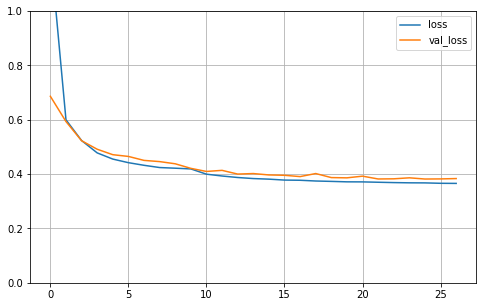

In [38]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [39]:
model.evaluate(x_test_scaled, y_test, verbose=0)

0.38716524839401245